In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style("white")

%matplotlib inline

In [2]:
image_base_path = "../image_data/DIP3E_Original_Images_CH04/"

## 图像重取样

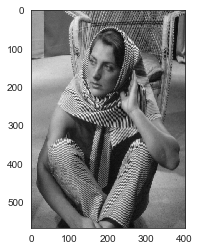

In [50]:
image = Image.open(os.path.join(image_base_path,"Fig0417(a)(barbara).tif"))
image = np.asarray(image)
image = image.astype("uint8")
plt.imshow(image,cmap="gray")

### 混淆

In [51]:
tmp_image = list()

def resize_half(image):
    """图像缩放为以前的二分之一
    """
    tmp_image = list()
    
    for i_row in range(image.shape[0]):
        tmp_row = list()
        if i_row % 2 == 0:
            continue
        for j_col in range(image.shape[1]):
            if j_col % 2 == 0:
                continue
            tmp_row.append(image[i_row][j_col])
        tmp_image.append(tmp_row)
        
    tmp_image = np.asarray(tmp_image)
    return tmp_image

In [52]:
print("原图像Shape:{}".format(image.shape))
image2 = resize_half(image)
print("压缩后的Shape：{}".format(image2.shape))

原图像Shape:(566, 402)
压缩后的Shape：(283, 201)


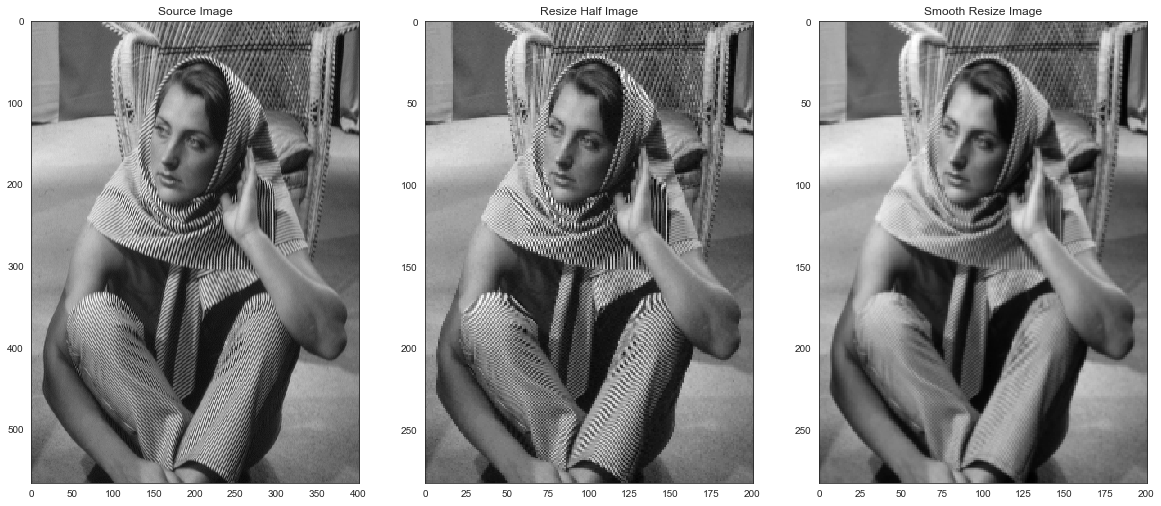

In [53]:
image3 = cv2.boxFilter(image,-1,(3,3),normalize = True)
image3 = resize_half(image3)

sns.set_style("white")
_,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax1.set_title("Source Image")
ax2.imshow(image2,cmap = "gray")
ax2.set_title("Resize Half Image")
ax3.imshow(image3,cmap = "gray")
ax3.set_title("Smooth Resize Image")

plt.show()
# plt.imshow(tmp_image,cmap = "gray")

### 锯齿

In [45]:
image = Image.open(os.path.join(image_base_path,"Fig0418(a)(ray_traced_bottle_original).tif"))
image = np.asarray(image)
image = image.astype(np.uint8)
image1 = cv2.resize(image,(image.shape[0] // 2,image.shape[1] // 2))
image2 = 

# 傅里叶谱的性质

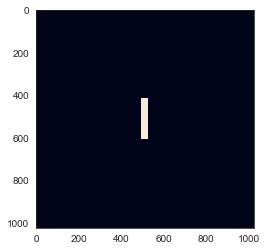

In [16]:
sns.set_style("white")
image = Image.open(os.path.join(image_base_path,"Fig0424(a)(rectangle).tif"))
image = np.asarray(image)
plt.imshow(image)

## 原图像谱

F:\Miya\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


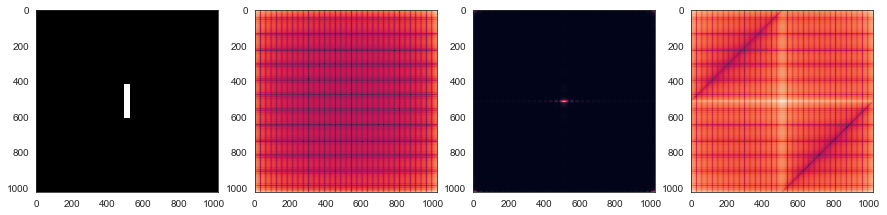

In [17]:
sns.set_style("white")
_,axe = plt.subplots(1,4,figsize = (15,8))

"""原图像"""
axe[0].imshow(image,cmap = "gray")

"""傅里叶谱"""
fft_image = np.fft.fft2(image)
axe[1].imshow(1 + np.log(np.abs(1 + fft_image)))

"""中心化后的傅里叶谱"""
tmp_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        tmp_image[i][j] = image[i][j] * np.power(-1,i + j)
        
tmp_fft_image = np.fft.fft2(tmp_image)
axe[2].imshow(np.abs(tmp_fft_image))

"""添加log"""
axe[3].imshow((1 + np.log(np.abs(tmp_fft_image))))

## 平移和旋转后的谱（TODO）

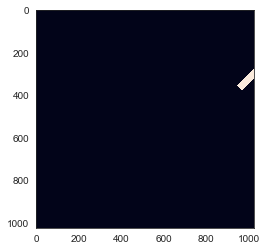

In [35]:
translation_image = Image.open(os.path.join(image_base_path,"Fig0425(a)(translated_rectangle).tif"))

image_shape = image.shape
image_shape = tuple(image_shape)

rotate_matrix = cv2.getRotationMatrix2D(image_shape,-45,1)
rotate_image = cv2.warpAffine(image,rotate_matrix,image_shape)
plt.imshow(rotate_image)

# 频率域滤波

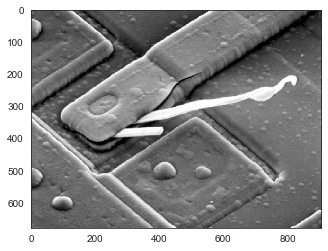

In [3]:
image = Image.open(os.path.join(image_base_path,"Fig0429(a)(blown_ic).tif"))
image = np.asarray(image)
plt.imshow(image,cmap = "gray")

## 直流分量置0

Text(0.5, 1.0, 'Result Image')

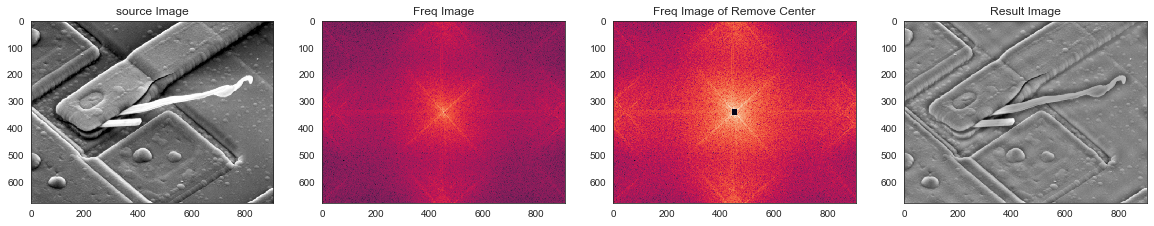

In [15]:
sns.set_style("white")
_,axe = plt.subplots(1,4,figsize = (20,15))

axe[0].imshow(image,cmap = "gray")
axe[0].set_title("source Image")

"""频谱图"""
w,h = image.shape

fft_image = np.fft.fft2(image)
fft_image = np.fft.fftshift(fft_image)

axe[1].imshow(np.log(1 + np.abs(fft_image)))
axe[1].set_title("Freq Image")
# axe[1].colorbar()

"""去除直流分量"""
mask = np.ones_like(fft_image,dtype=int)

scope = 10
mask[(w//2 - scope):(w//2 + scope),(h//2 -scope):(h//2 + scope)] = 0
fft_image = fft_image * mask 
axe[2].imshow(np.log(1 + np.abs(fft_image)),)
axe[2].set_title("Freq Image of Remove Center")
# axe[2].colorbar()

"""还原结果图"""
r_image = np.fft.ifft2(np.fft.ifftshift(fft_image))
axe[3].imshow(r_image.real,cmap="gray")
axe[3].set_title("Result Image")
# axe[3].colorbar()


## 频域高斯滤波器

In [18]:
def get_two_dim_gaussian_kernel(shape:(int,int),sigma:float) -> np.ndarray:
    """返回二维的高斯核
    """
    x = cv2.getGaussianKernel(shape[0],sigma)
    y = cv2.getGaussianKernel(shape[1],sigma)
    return np.multiply(x,np.transpose(y))

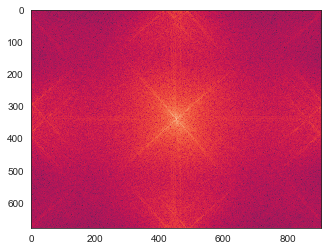

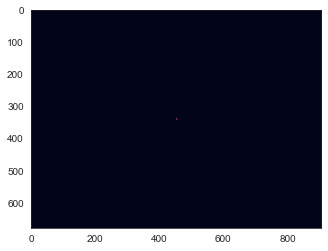

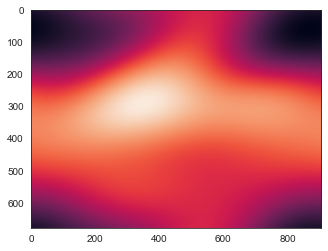

In [80]:
from mpl_toolkits import mplot3d

sns.set_style("white")

w,h = image.shape

fft_image = np.fft.fft2(image)
fft_image = np.fft.fftshift(fft_image)
plt.imshow(np.log(np.abs(fft_image)))
plt.show()

kernel1 = get_two_dim_gaussian_kernel(fft_image.shape,1)
plt.imshow(kernel1)
plt.show()

fft_image1 = fft_image *  ( kernel1)
fft_image1 = np.fft.ifftshift(fft_image1)
r_image1 = np.fft.ifft2(fft_image1)
plt.imshow(r_image1.real)
